In [8]:
# - * - coding: utf-8 - * -
import librosa
import librosa.display
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import wave
import warnings
warnings.filterwarnings('ignore')
plt.figure(dpi=800, figsize=(20, 5))
matplotlib.rc("font",family=['Times New Roman'])
matplotlib.rc("font",size=11)
matplotlib.rcParams['axes.unicode_minus']=False 

<Figure size 16000x4000 with 0 Axes>

103184 16000


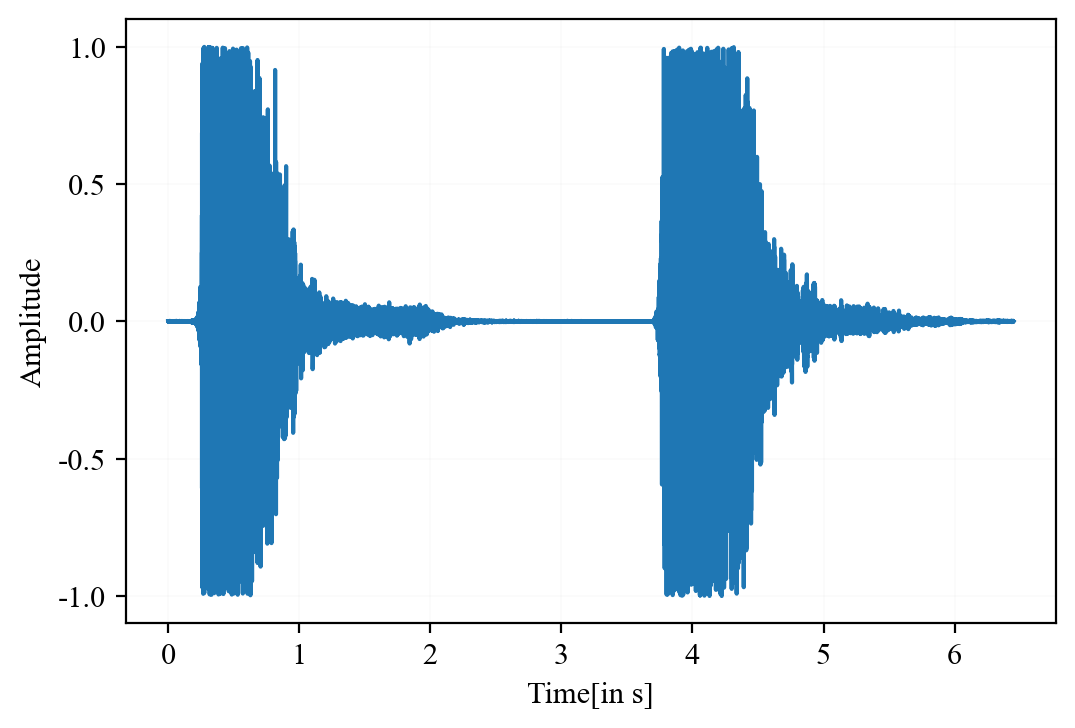

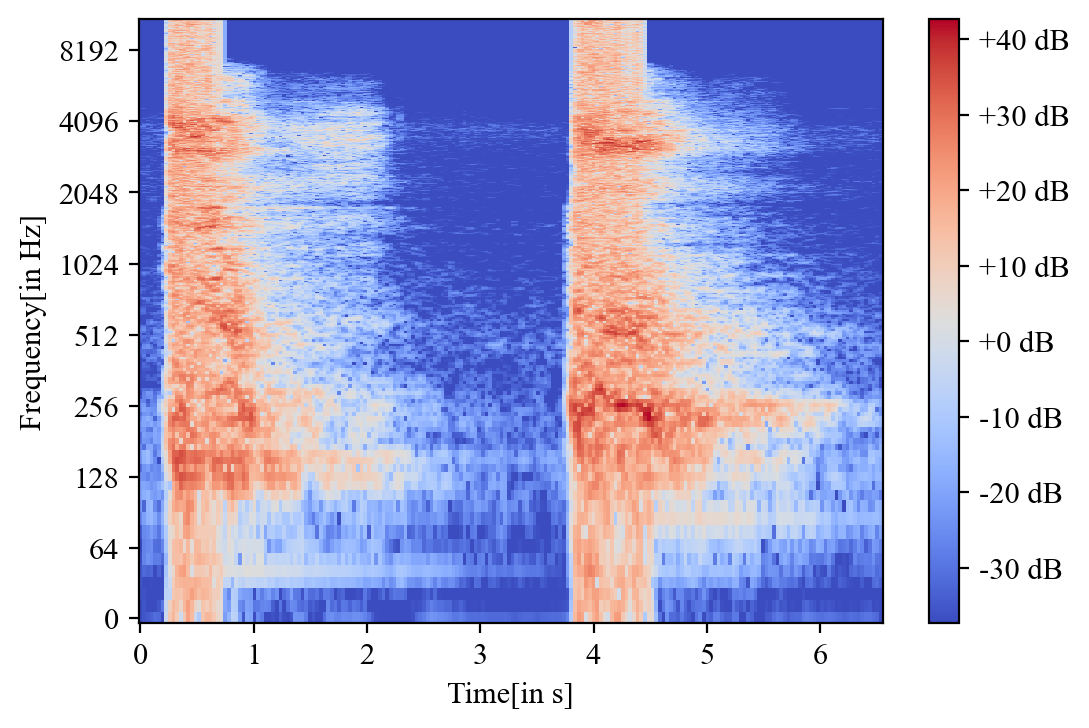

In [13]:
def displayWaveform1(path, savename): # 显示语音时域波形
    """
    display waveform of a given speech sample
    :param sample_name: speech sample name
    :param fs: sample frequency
    :return:
    """
    samples, sr = librosa.load(path, sr=6000)

    print(len(samples), sr)
    time = np.arange(0, len(samples)) 
    plt.figure(figsize=(12, 5), dpi=800)
    plt.plot(time, samples, linewidth=0.5)
    f = wave.open(path)
    duration = f.getnframes()/float(f.getframerate())
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(color='k', linestyle='-', linewidth=1,alpha=0.1)
    plt.savefig(savename, dpi=800)
    plt.show()
def displayWaveform(filepath, savename): # 显示语音时域波形
    """
    display waveform of a given speech sample
    :param sample_name: speech sample name
    :param fs: sample frequency
    :return:
    """
    samples, sr = librosa.load(filepath, sr=16000)

    print(len(samples), sr)
    time = np.arange(0, len(samples)) * (1.0 / sr)
    plt.figure( dpi=200)
    plt.plot(time, samples)
    plt.xticks( np.arange(0, 7))
    plt.yticks(np.arange(-1, 1.1, step=0.5))
    plt.xlabel("Time[in s]")
    plt.ylabel("Amplitude")
    plt.grid(color='k', linestyle='-', linewidth=0.1,alpha=0.1)
    plt.savefig(savename, dpi=200)
    plt.show()
def displaySpectrogram(filepath, savename):
    x, sr = librosa.load(filepath, sr=16000)
    spectrogram = librosa.amplitude_to_db(librosa.stft(x))
    plt.figure(dpi=200)
    # show
    librosa.display.specshow(spectrogram, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.xticks(np.arange(0, 5, step=5/7), np.arange(0, 7))
    plt.xlabel('Time[in s]')
    plt.ylabel('Frequency[in Hz]')
    plt.savefig(savename, dpi=200)
    plt.show()
path = './wav_to_plot/new.wav'
displayWaveform(path, './figure/Waveform_orign.png')
displaySpectrogram('./wav_to_plot/new.wav', './figure/Spectrom_orign.png')


In [31]:
# from wav_augment import gaussian_white_noise_numpy,read_wave_from_file,time_shift_numpy,save_wav
# audio_data,sr = read_wave_from_file('./wav_to_plot/875_Positive_male_37.wav')
# print(sr)
# audio_data = audio_data.copy()
# data_type = audio_data[0].dtype
# audio_data = audio_data[118000:]
# audio_data.astype(data_type)
# save_wav('./wav_to_plot/new.wav', audio_data)

103184 16000


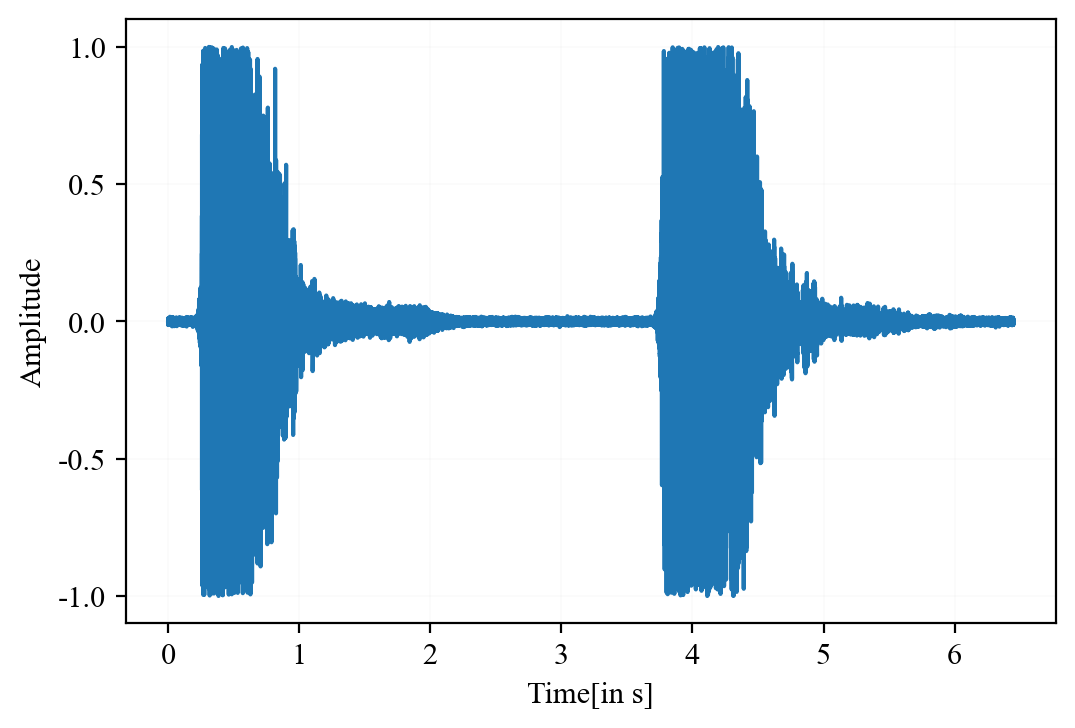

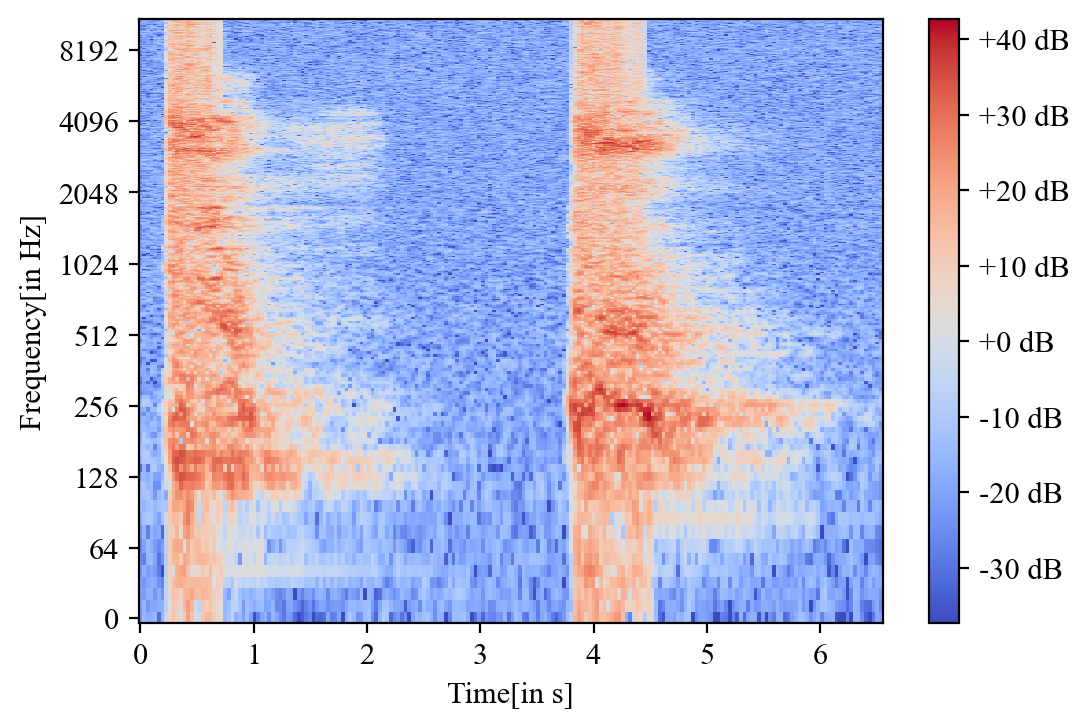

In [15]:
# from wav_augment import gaussian_white_noise_numpy,read_wave_from_file,time_shift_numpy,save_wav
# file = './wav_to_plot/new.wav'
# # 1. 高斯白噪声
# audio_data, _ = read_wave_from_file(file)
# audio_data1 = gaussian_white_noise_numpy(audio_data)
# out_file1 = f'./wav_to_plot/gaussian_white_noise.wav'
# save_wav(out_file1, audio_data1)
path = './wav_to_plot/gaussian_white_noise.wav'
displayWaveform(path, './figure/Waveform_gaussian_white_noise.png')
displaySpectrogram(path, './figure/Spectrom_gaussian_white_noise.png')

103184 16000


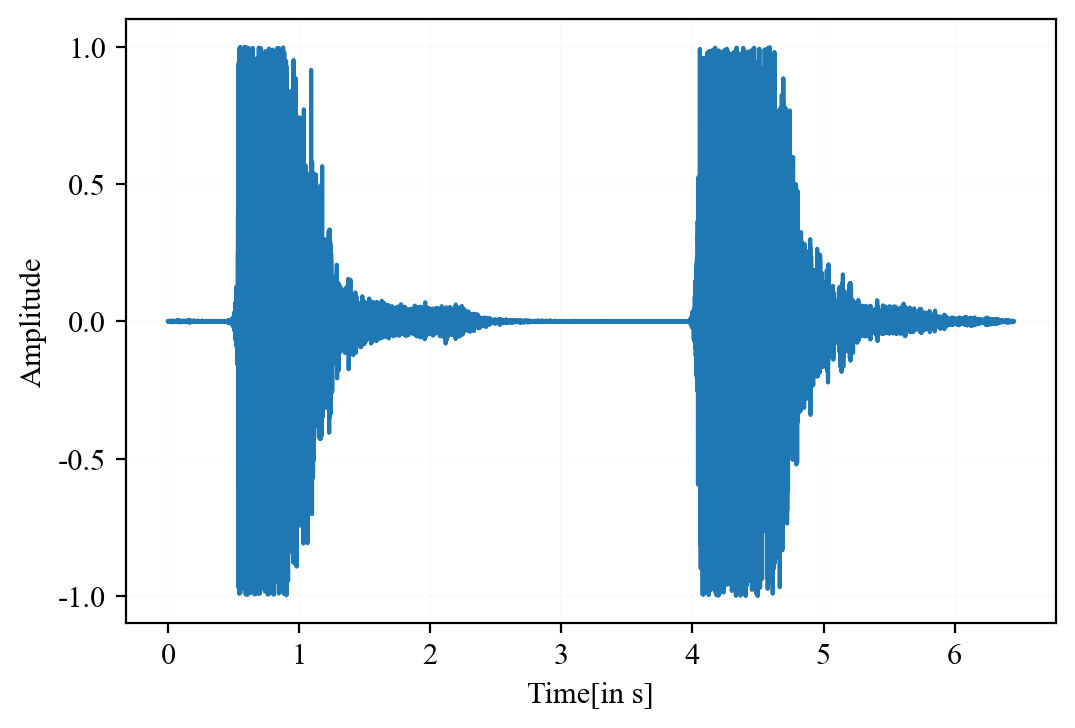

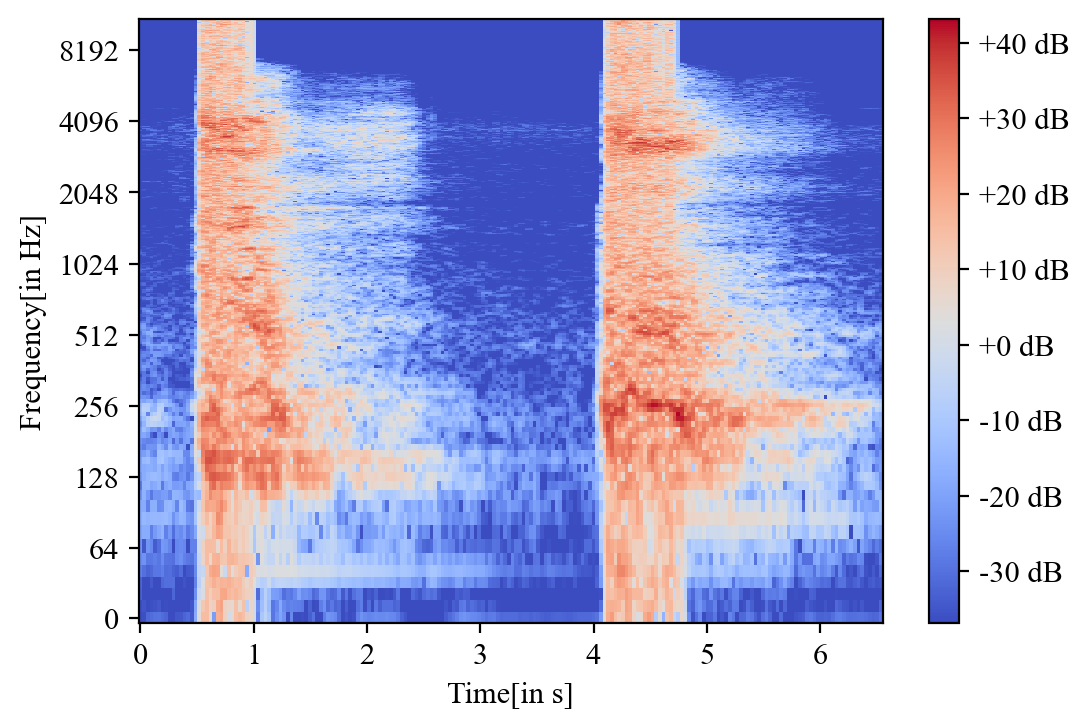

In [16]:
# 2.时间变化
# audio_data2 = time_shift_numpy(audio_data)
# out_file2 = f'./wav_to_plot/time_shift.wav'
# save_wav(out_file2, audio_data2)
path = './wav_to_plot/time_shift.wav'
displayWaveform(path, './figure/Waveform_time_shift.png')
displaySpectrogram(path, './figure/Spectrom_time_shift.png')

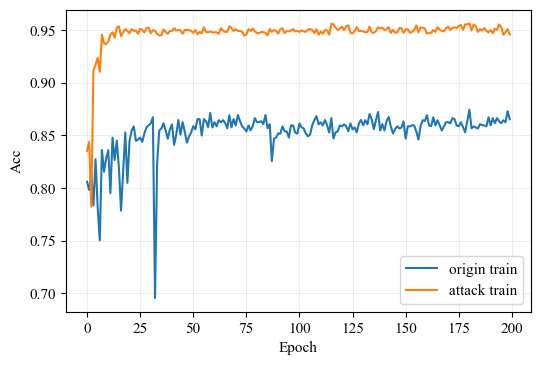

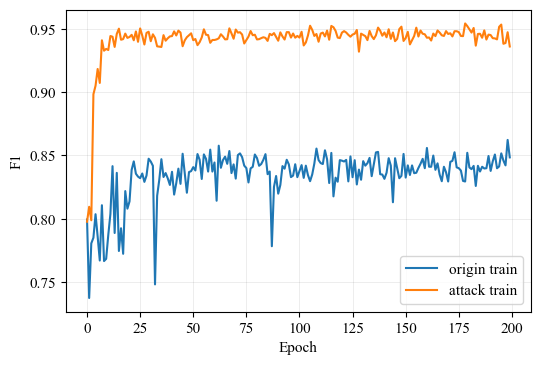

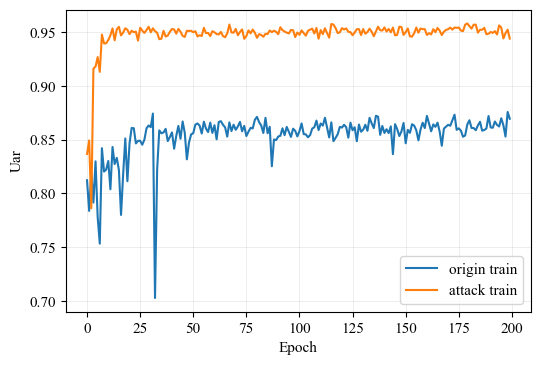

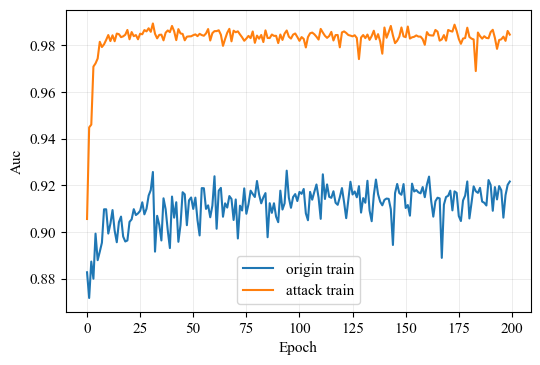

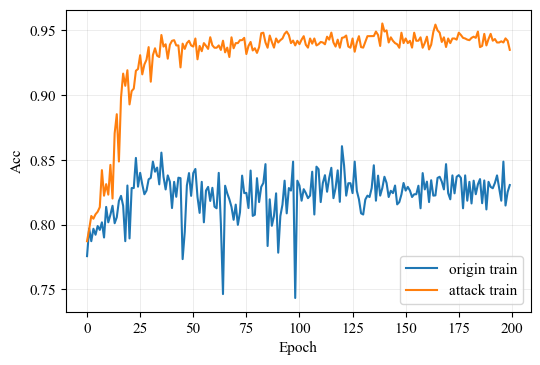

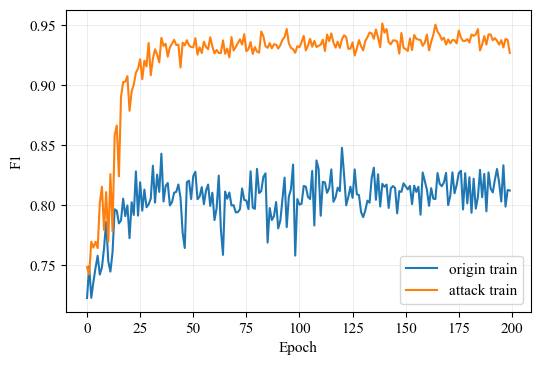

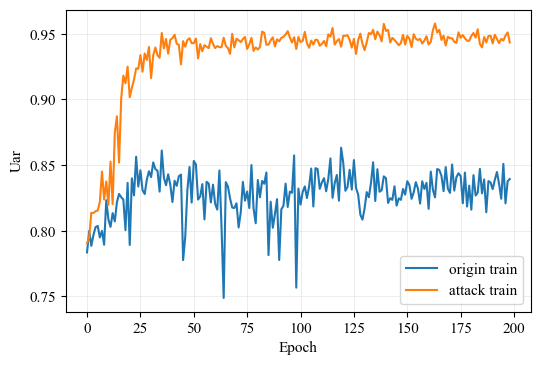

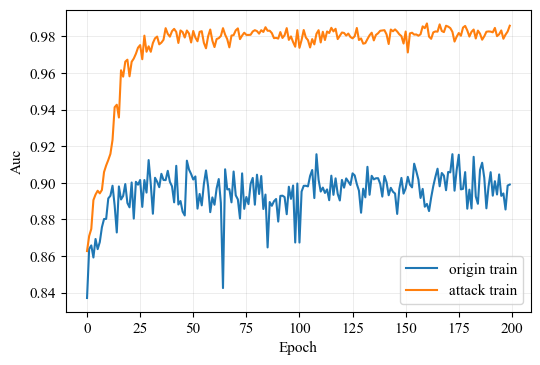

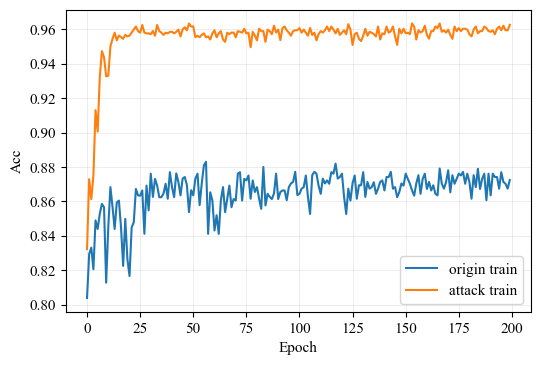

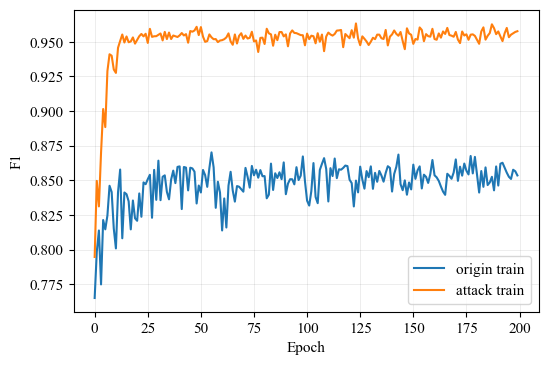

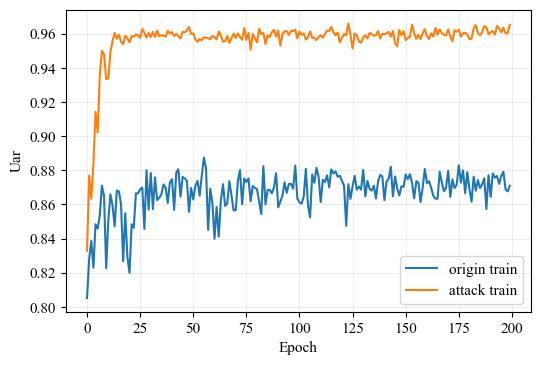

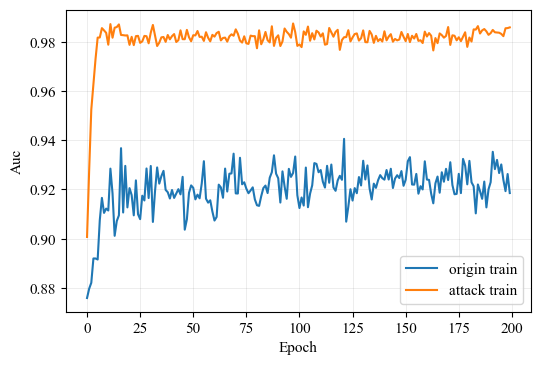

In [42]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

def extract_data(log_name):
    Acc = []
    F1 = []
    Uar = []
    Auc = []
    max_acc = 0.0
    max_f1 = 0.0
    max_uar = 0.0
    max_auc = 0.0
    f = open(log_name, "r", encoding="utf-8")
    lines = f.readlines()
    flag = True
    for line in lines:
        flag = not flag
        if flag==False:
            continue
        acc = re.findall(r"(?<=acc\:\ )\d+\.?\d*",line)
        f1 = re.findall(r"(?<=f1_score\:\ )\d+\.?\d*",line)
        uar = re.findall(r"(?<=uar\:\ )\d+\.?\d*", line)
        auc = re.findall(r"(?<=auc\:\ )\d+\.?\d*", line)
        Acc.append(float(acc[0]))
        F1.append(float(f1[0]))
        try:
            Uar.append(float(uar[0]))
            max_uar = float(uar[0]) if float(uar[0])>max_uar else max_uar
        except IndexError:
            pass
        Auc.append(float(auc[0]))
        max_acc = float(acc[0]) if float(acc[0])>max_acc else max_acc
        max_f1 = float(f1[0]) if float(f1[0])>max_f1 else max_f1
        max_auc = float(auc[0]) if float(auc[0])>max_auc else max_auc
    return Acc, F1, Uar, Auc

def plot_figure(yname, values1, values2, filename):
    x = [i for i in range(len(values1))]
    plt.figure(dpi=100)
    plt.plot(x, values1, label='origin train')
    plt.plot(x, values2, label='attack train')
    plt.xlabel("Epoch")
    plt.ylabel(yname)
    plt.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.1)
    plt.legend()
    plt.savefig(filename)
    plt.show()

def plot2(model_name = 'ResNet18'):
    Acc1, F11, Uar1, Auc1 = extract_data(f"./log/plot/log_spectrogram_{model_name}.log" )
    Acc2, F12, Uar2, Auc2 = extract_data(f"./log/plot/log_spectrogram_{model_name}_attack.log" )
    plot_figure(f"Acc", Acc1, Acc2, f"./figure/acc_spectrogram_{model_name}.png")
    plot_figure(f"F1", F11, F12, f"./figure/f1_score_spectrogram_{model_name}.png")
    plot_figure(f"Uar", Uar1, Uar2, f"./figure/uar_spectrogram_{model_name}.png")
    plot_figure(f"Auc", Auc1, Auc2, f"./figure/auc_spectrogram_{model_name}.png")

plot2('ResNet18')
plot2('ResNet50')
plot2('Cider')

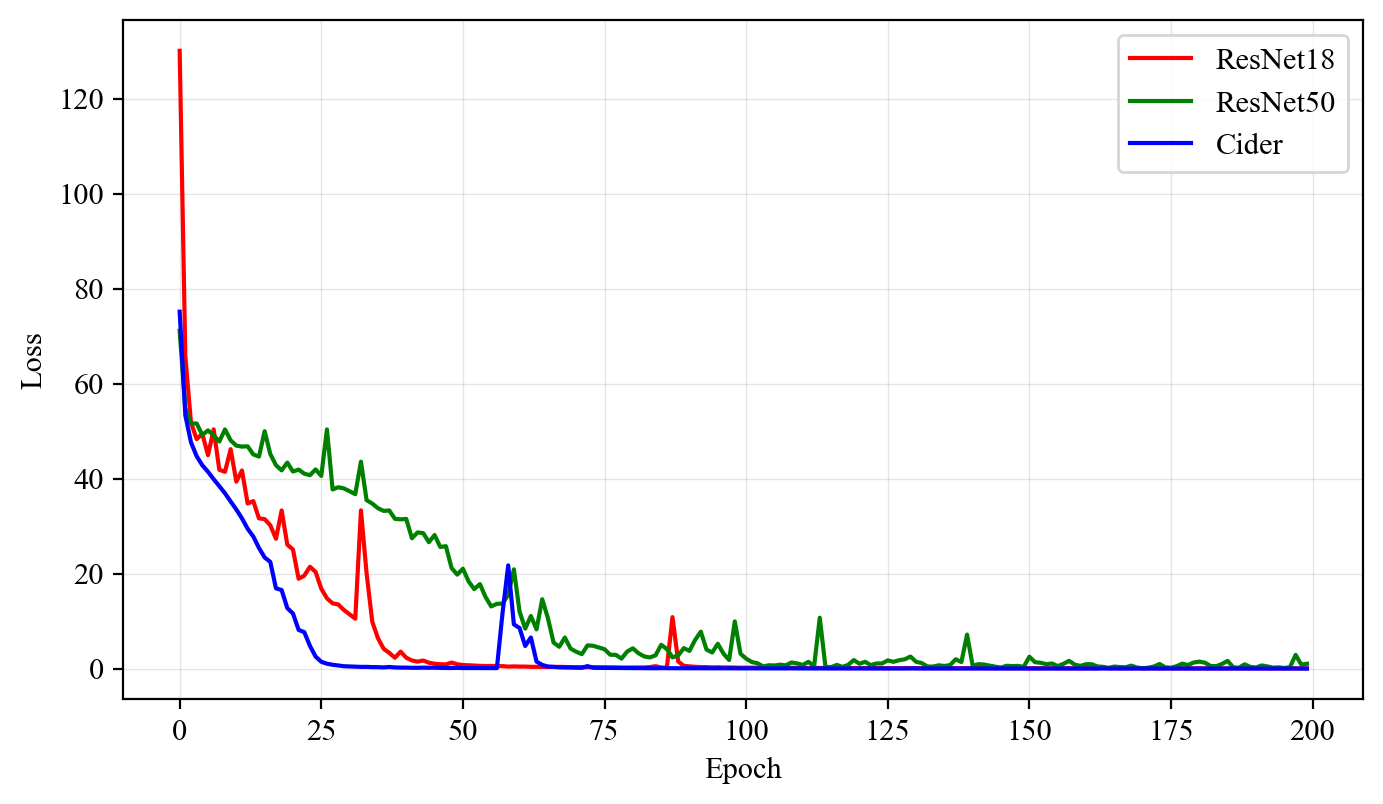

In [18]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

losses = []
model_names = ['ResNet18', 'ResNet50', 'Cider']
feature = 'spectrogram'
i=0
for model_name in model_names:
    train_loss = []
    f = open(f"./log/plot/log_{feature}_{model_name}.log", "r", encoding="utf-8")
    lines = f.readlines()
    flag = True
    for line in lines:
        flag = not flag
        if flag==True:
            continue    
        loss = re.findall(r"(?<=loss\:\ )\d+\.?\d*", line)
        train_loss.append(float(loss[0]))
        
        i+=1    
    losses.append(train_loss)   

x = [i for i in range(len(losses[0]))]
plt.figure(figsize=(8,4.5), dpi=200)
plt.plot(x, losses[0], label='ResNet18', c='r')
plt.plot(x, losses[1], label='ResNet50', c='g')
plt.plot(x, losses[2], label='Cider', c='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.1)
plt.savefig('./figure/loss.png')
plt.legend(loc='upper right')
plt.show()

In [19]:
# attack 
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

model_names = ['ResNet18', 'ResNet50', 'Cider']
methods = ['fgsm', 'pgd']

Model_accs = []
Attack_accs = []
Dists = []

for method in methods:
    model_accs = []
    attack_accs = []
    dists = []
    for model_name in model_names:
        model_acc = []
        attack_acc = []
        dist = []
        f = open(f"./log/plot/log_{model_name}_{method}.log", "r", encoding="utf-8")
        lines = f.readlines()
        for line in lines: 
            macc = re.findall(r"(?<=512\=)\d+\.?\d*", line)
            model_acc.append(float(macc[0]))            
            aacc = re.findall(r"(?<=rate\:)\d+\.?\d*", line)
            attack_acc.append(float(aacc[0]))
            dt = re.findall(r"(?<=dist\(l2n\)\:)\d+\.?\d*", line)
            dist.append(float(dt[0]))   
        model_accs.append(model_acc)
        attack_accs.append(attack_acc)
        dists.append(dist)       
    Model_accs.append(model_accs)
    Attack_accs.append(attack_accs)
    Dists.append(dists)

print(Model_accs)
print(Attack_accs)
print(Dists)
# print(train_loss)
# plot_figure(train_loss, f"./figure/loss_{feature}_{model_name}.png")

[[[0.857422, 0.134766, 0.130859, 0.113281, 0.095703], [0.810547, 0.560547, 0.482422, 0.4375, 0.462891], [0.855469, 0.054688, 0.009766, 0.011719, 0.007812]], [[0.851562, 0.162109, 0.167969, 0.146484, 0.089844], [0.824219, 0.351562, 0.224609, 0.146484, 0.115234], [0.863281, 0.001953, 0.0, 0.0, 0.0]]]
[[[0.142578, 0.865234, 0.869141, 0.886719, 0.904297], [0.189453, 0.439453, 0.517578, 0.5625, 0.537109], [0.144531, 0.945312, 0.990234, 0.988281, 0.992188]], [[0.148438, 0.837891, 0.832031, 0.853516, 0.910156], [0.175781, 0.648438, 0.775391, 0.853516, 0.884766], [0.136719, 0.998047, 1.0, 1.0, 1.0]]]
[[[0.0, 6.247035, 12.511304, 25.321538, 51.15278], [0.0, 6.658397, 13.401155, 26.913759, 53.882224], [0.0, 6.735278, 13.470556, 26.941112, 53.882224]], [[0.0, 4.883477, 8.607778, 16.051318, 31.447643], [0.0, 4.760119, 8.665301, 16.134598, 31.373258], [0.0, 5.786214, 11.085451, 19.36803, 33.868886]]]


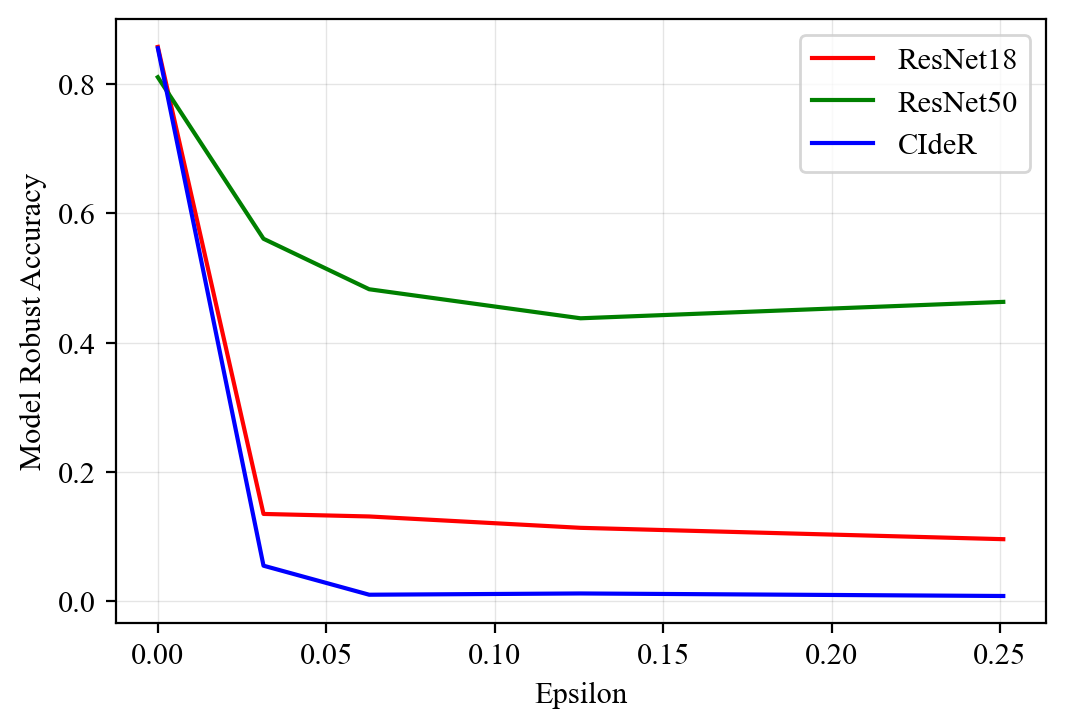

In [21]:
# fgsm 模型准确率
x = [0, 8/255, 16/255, 32/255, 64/255]
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x, Model_accs[0][0], label='ResNet18', c='r')
plt.plot(x, Model_accs[0][1], label='ResNet50', c='g')
plt.plot(x, Model_accs[0][2], label='CIdeR', c='b')
plt.xlabel("Epsilon")
plt.ylabel("Model Robust Accuracy")
plt.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.1)
plt.savefig("./figure/fgsm_modelAcc.png")
plt.legend(loc='upper right')
plt.show()

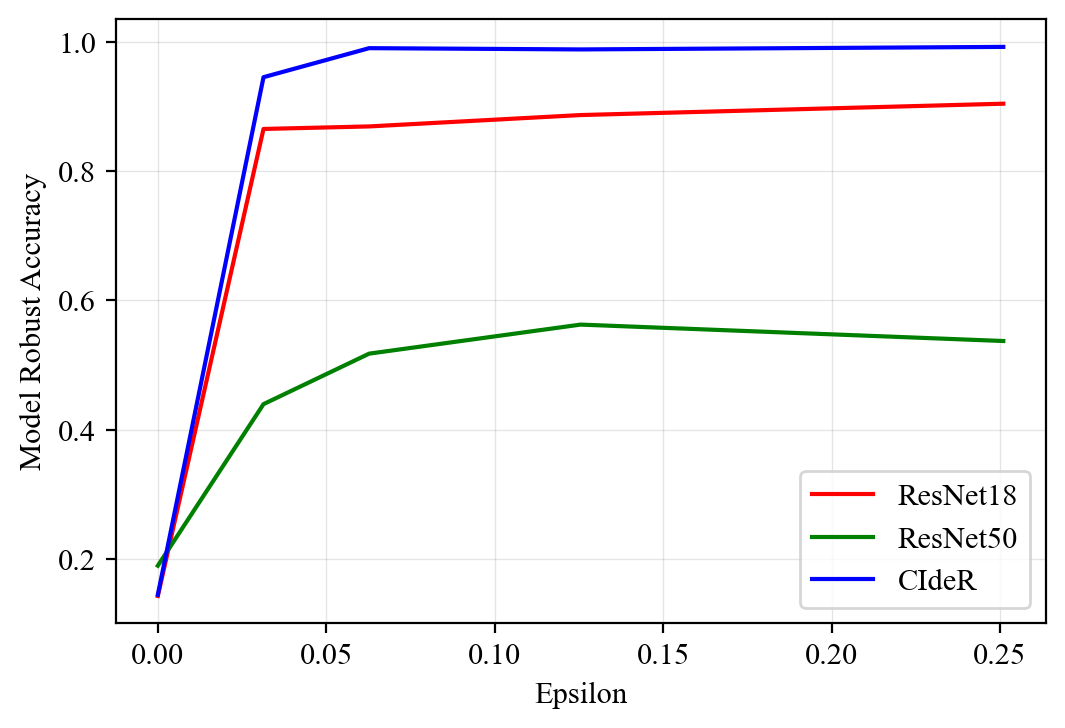

In [22]:
# fgsm 攻击成功率
x = [0, 8/255, 16/255, 32/255, 64/255]
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x, Attack_accs[0][0], label='ResNet18', c='r')
plt.plot(x, Attack_accs[0][1], label='ResNet50', c='g')
plt.plot(x, Attack_accs[0][2], label='CIdeR', c='b')
plt.xlabel("Epsilon")
plt.ylabel("Model Robust Accuracy")
plt.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.1)
plt.savefig('./figure/fgsm_attackAcc.png')
plt.legend(loc='best')
plt.show()

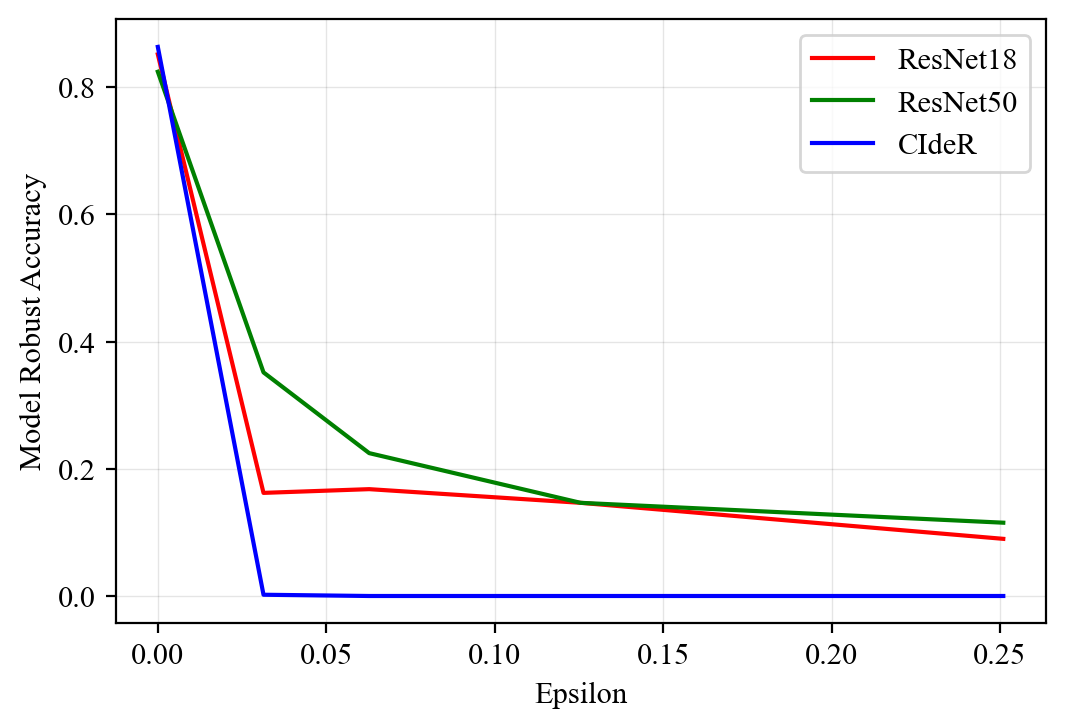

In [23]:
# pgd 模型准确率
x = [0, 8/255, 16/255, 32/255, 64/255]
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x, Model_accs[1][0], label='ResNet18', c='r')
plt.plot(x, Model_accs[1][1], label='ResNet50', c='g')
plt.plot(x, Model_accs[1][2], label='CIdeR', c='b')
plt.xlabel("Epsilon")
plt.ylabel("Model Robust Accuracy")
plt.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.1)
plt.savefig('./figure/pgd_modelAcc.png')
plt.legend(loc='upper right')
plt.show()

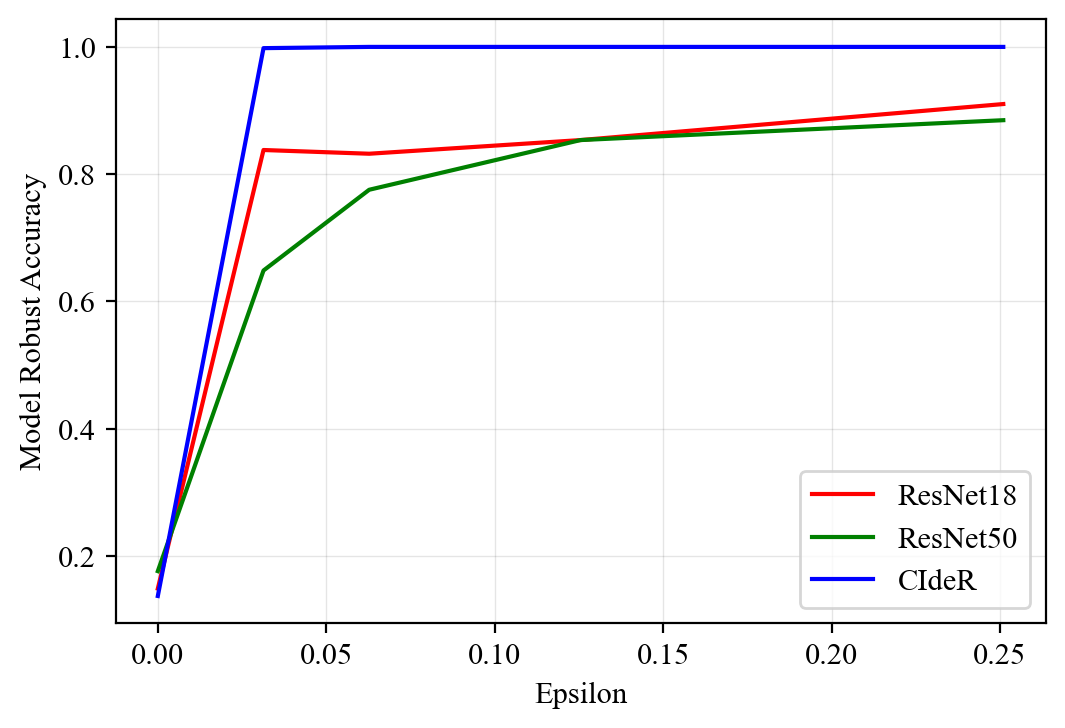

In [24]:
# pgd 攻击成功率
x = [0, 8/255, 16/255, 32/255, 64/255]
plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x, Attack_accs[1][0], label='ResNet18', c='r')
plt.plot(x, Attack_accs[1][1], label='ResNet50', c='g')
plt.plot(x, Attack_accs[1][2], label='CIdeR', c='b')
plt.xlabel("Epsilon")
plt.ylabel("Model Robust Accuracy")
plt.grid(color='k', linestyle='-', linewidth=0.5,alpha=0.1)
plt.savefig('./figure/pgd_attackAcc.png')
plt.legend(loc='best')
plt.show()

In [25]:
import pandas as pd
df = pd.read_excel('./figure/count.xlsx')
df

,Age,Covid_status,Gender
0,37,Negative,male
1,29,Negative,male
2,24,Negative,male
3,29,Negative,male
4,25,Negative,female
...,...,...,...
1880,56,Positive,female
1881,70,Positive,female
1882,46,Positive,female
1883,32,Positive,male


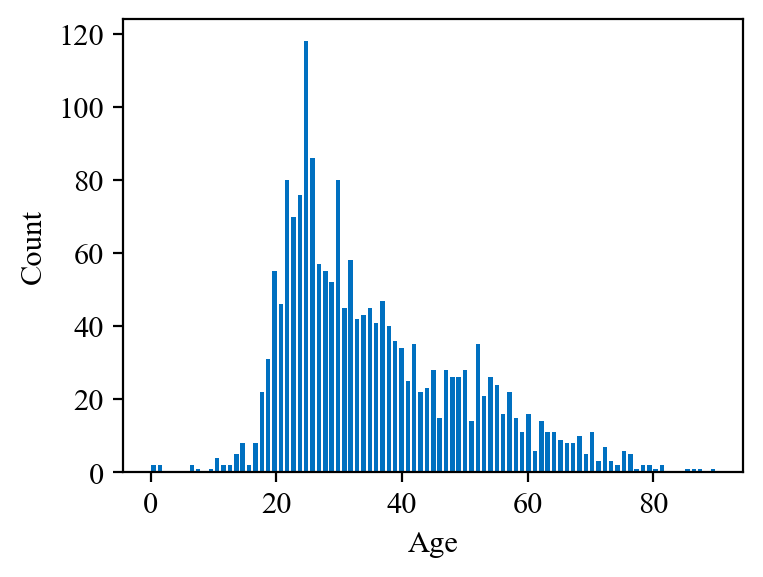

In [27]:
plt.figure(dpi=200, figsize=(4,3))
x = np.linspace(0, 90, 90)
plt.hist(df['Age'], x, rwidth=0.7,color='#0070C0')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('./figure/age.png')
plt.show()

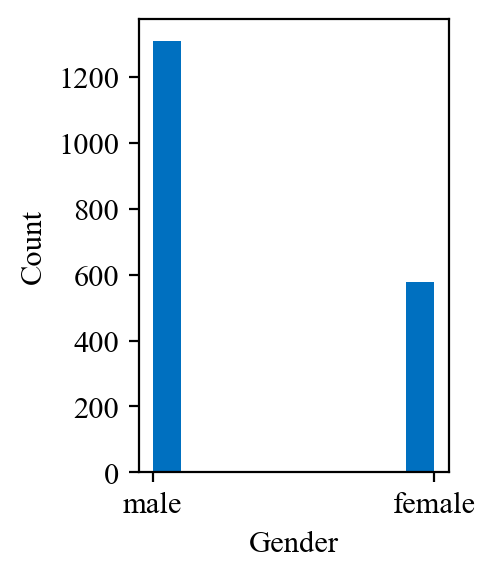

In [28]:
new_gen = []

for g in df['Gender'].tolist():
    if g != 'other':
        new_gen.append(g)

plt.figure(dpi=200, figsize=(2,3))

plt.hist(new_gen, color='#0070C0')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('./figure/gender.png')
plt.show()

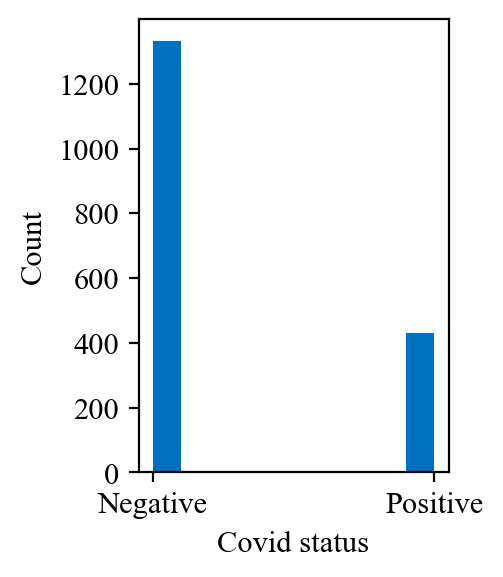

In [29]:
new_gen = []

for g in df['Covid_status'].tolist():
    if g != 'Unknown':
        new_gen.append(g)

plt.figure(dpi=200,figsize=(2,3))

plt.hist(new_gen,color='#0070C0')
plt.xlabel('Covid status')
plt.ylabel('Count')
plt.savefig('./figure/status.png')
plt.show()

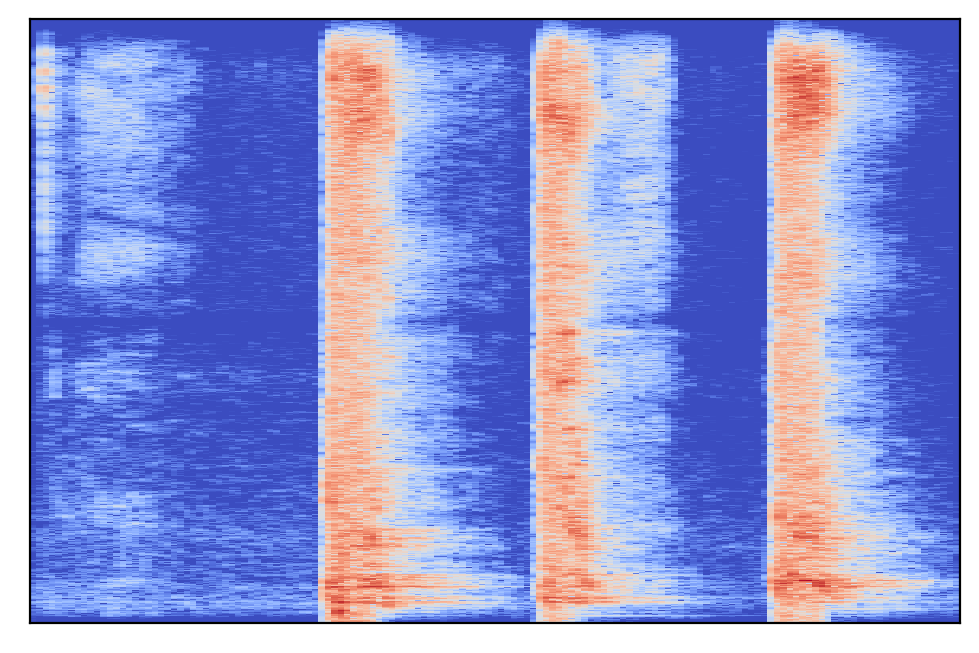

In [31]:
def displaySpectrogram(filepath, savename):
    x, sr = librosa.load(filepath, sr=16000)
    spectrogram = librosa.amplitude_to_db(librosa.stft(x))
    plt.figure(dpi=200)
    # show
    librosa.display.specshow(spectrogram)
    plt.savefig(savename)
    plt.show()
displaySpectrogram('./wav_to_plot/875_Positive_male_37.wav', './figure/spec.png')

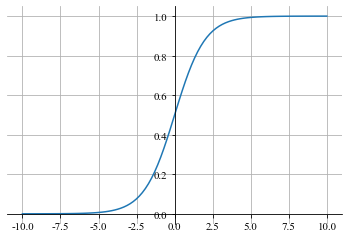

In [36]:
# Sigmoid函数
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

fig, ax = plt.subplots()
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
ax.plot(x, y)
# 画轴
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('axes', 0.5))
plt.grid() # 设置方格
plt.savefig('./figure/sigmoid.png', dpi=200)
plt.show()

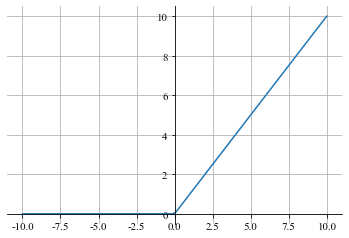

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 100)
y = relu(x)
ax.plot(x, y)
# 画轴
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('axes', 0.5))
plt.grid() # 设置方格
plt.savefig('./figure/relu.png', dpi=200)
plt.show()